# Countries clustering and ranking based on their need for help

### Result:

* Cluster1: These are the countries that need immediate help. They have low Gdpp. Also many of them have meduim to high health expenses. **In this cluster, countries with higher health expenses have higher priority**
* Cluster2: These are the countries that do not need help. Although they have low to meduim Gdpp, they managed to have a health expense relative to their income. (Probably by having a very efficient health system)
* Cluster3:  These are the countries that do not need help. Their health system is efficient like cluster2 but they have a higher Gdpp.

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.patches as ptch
import scipy.cluster.hierarchy as sch

# 1. Data loading

In [2]:
data = pd.read_csv("../input/unsupervised-learning-on-country-data/Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# feature selection 
# all columns except the country name

X = data.iloc[:, 1:].values

# 2. Use Elbow plot and Dendrogram to pick a number clusters for K-means

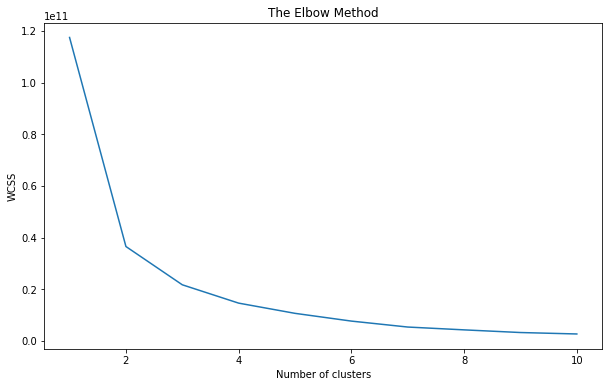

In [4]:
wcss = []
max_possible_clusters = 10
for i in range(1, max_possible_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))    
plt.plot(range(1, max_possible_clusters + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

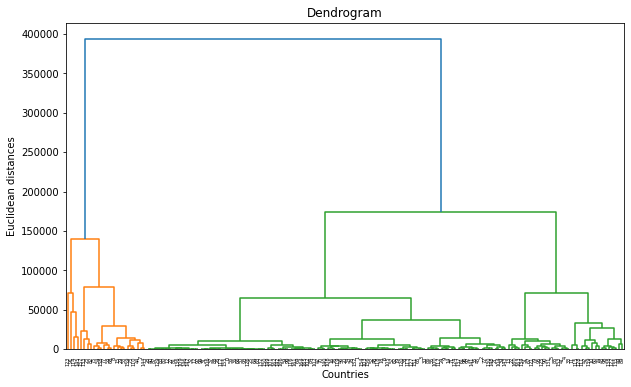

In [5]:
plt.figure(figsize=(10,6)) 
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
dendro = sch.dendrogram(sch.linkage(X, method='ward'))

#### - From the elbow shape we can say that the optimal number of clusters is either 2 or maybe 3. 
#### - From the Dendrogram shape we can say that the optimal number of clusters is most probably 2. 
#### - We pick **k=3** since we want to rank the countries based on their need for help (1,2,3) 

# 3. K-means clustering

In [6]:
number_of_clusters = 3
kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
y_kmeans_pred = kmeans.fit_predict(X)

In [7]:
y_kmeans_pred

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### - Now that we have the clusters, we need to decide which one (0 or 1 or 2) tells us about the help priority
#### - We plot the clusters based one two columns. The selected columns are "gdpp" and "health". Gdpp gives us a good insight about the economy. Health expense with combination of gdpp can tell us how much people in a country can afford to pay for their health. This has direct impact on other health related features such as "child_mort" and "life_expec".

In [8]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

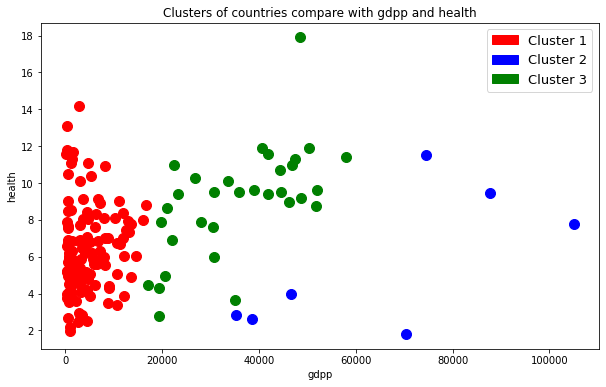

In [9]:
gdpp_index = list(data.columns).index('gdpp') - 1 # minus one since we removed country name from X
health_index = list(data.columns).index('health') - 1
plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
plt.legend(handles=[red_patch, blue_patch, green_patch], loc=1, prop={'size': 13})
plt.title('Clusters of countries compare with gdpp and health')
plt.xlabel('gdpp')
plt.ylabel('health')
plt.scatter(X[y_kmeans_pred == 0, gdpp_index], X[y_kmeans_pred == 0, health_index], s = 100, c = 'red')
plt.scatter(X[y_kmeans_pred == 1, gdpp_index], X[y_kmeans_pred == 1, health_index], s = 100, c = 'blue')
plt.scatter(X[y_kmeans_pred == 2, gdpp_index], X[y_kmeans_pred == 2, health_index], s = 100, c = 'green')

# 4. Result discussion

#### We can say based on the above plot that these are the Ranking:

- **Red Cluster** : These are the countries that need immediate help. They have low Gdpp. Also many of them have meduim to high health expenses. 

- **Green Cluster** : These are the countries that do not need help. Although they have low to meduim Gdpp,they managed to have a health expense relative to their income. (Probably by having a very efficient health system)

- **Blue Cluster** : These are the countries that do not need help. Their health system is efficient like the green cluster but they have higher Gdpp.

### Red clusters countries

In [10]:
data.iloc[:, 0].values[y_kmeans_pred==0]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Madagascar', 'Malawi

### Green clusters countries

In [11]:
data.iloc[:, 0].values[y_kmeans_pred==1]

array(['Brunei', 'Kuwait', 'Luxembourg', 'Norway', 'Qatar', 'Singapore',
       'Switzerland'], dtype=object)

### Blue clusters countries

In [12]:
data.iloc[:, 0].values[y_kmeans_pred==2]

array(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea',
       'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Malta', 'Netherlands', 'New Zealand',
       'Oman', 'Portugal', 'Saudi Arabia', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)